In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os

In [2]:
eosdir_pos = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-positive/'
eosdir_neg = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-negative/'

df_true = pd.DataFrame()
df_data = pd.DataFrame()

print('Processing + charge')
for f in os.listdir(eosdir_pos):
    if 'recon' in f:
        continue
        
    df_true = pd.concat([df_true,pd.read_csv(eosdir_pos+f)])
    df_data = pd.concat([df_data,pd.read_csv(eosdir_pos+"/recon1Dy_"+f.split('_')[1])])
        
print('Processing - charge')
for f in os.listdir(eosdir_neg):
    if 'recon' in f:
        continue
        
    df_true = pd.concat([df_true,pd.read_csv(eosdir_neg+f)])
    df_data = pd.concat([df_data,pd.read_csv(eosdir_neg+"/recon1Dy_"+f.split('_')[1])])
    

Processing + charge
Processing - charge


In [3]:
threshold = 0.2 # GeV

In [4]:
df_pos_low = df_data[(abs(df_true['pt'])<threshold) & (df_true['pt']>0)]
df_neg_low = df_data[(abs(df_true['pt'])<threshold) & (df_true['pt']<0)]
df_high = df_data[df_true['pt']>3]

In [5]:
def yprofile(j,yloc_min,yloc_max):
    
    print(yloc_min,yloc_max)
    
    df_pos_low = df_data[(abs(df_true['pt'])<threshold) & (df_true['pt']>0) & (df_true['y-local']<yloc_max) & (df_true['y-local']>yloc_min)]
    df_neg_low = df_data[(abs(df_true['pt'])<threshold) & (df_true['pt']<0) & (df_true['y-local']<yloc_max) & (df_true['y-local']>yloc_min)]
    df_high = df_data[(df_true['pt']>threshold) & (df_true['y-local']<yloc_max) & (df_true['y-local']>yloc_min)]

    x_pos_low = np.repeat(a=range(0,13),repeats=len(df_pos_low))
    x_neg_low = np.repeat(a=range(0,13),repeats=len(df_neg_low))
    x_high = np.repeat(a=range(0,13),repeats=len(df_high))
    
    mean_pos_low = []
    std_pos_low = []
    
    mean_neg_low = []
    std_neg_low = []
    
    mean_high = []
    std_high = []

    for i in range(0,13):
        mean_pos_low += [np.mean(df_pos_low[str(i)])]
        std_pos_low += [np.std(df_pos_low[str(i)])]
    
        mean_neg_low += [np.mean(df_neg_low[str(i)])]
        std_neg_low += [np.std(df_neg_low[str(i)])]
        
        mean_high += [np.mean(df_high[str(i)])]
        std_high += [np.std(df_high[str(i)])]
        
    mean_pos_low = np.array(mean_pos_low)
    mean_neg_low = np.array(mean_neg_low)
    mean_high = np.array(mean_high)
    
    std_pos_low = np.array(std_pos_low)
    std_neg_low = np.array(std_neg_low)
    std_high = np.array(std_high)
    
    #plt.errorbar(x=range(0,13),y=mean_pos_low,yerr=std_pos_low,marker='o',linestyle='',color='red')
    #plt.errorbar(x=range(0,13),y=mean_neg_low,yerr=std_neg_low,marker='o',linestyle='',color='blue')
    #plt.errorbar(x=range(0,13),y=mean_high,yerr=std_high,marker='o',linestyle='',color='black')
    
    #hist = plt.hist2d(x=x_pos_low,y=np.array(df_pos_low).flatten(),bins=[range(0,14),np.linspace(200,10000,100)],norm=colors.LogNorm())
    #plt.show()
    #hist = plt.hist2d(x=x_neg_low,y=np.array(df_neg_low).flatten(),bins=[range(0,14),np.linspace(200,10000,100)],norm=colors.LogNorm())
    #plt.show()
    #hist = plt.hist2d(x=x_high,y=np.array(df_high).flatten(),bins=[range(0,14),np.linspace(200,10000,100)],norm=colors.LogNorm())
    #plt.show()
    
    plt.hist(x=range(0,13),weights=mean_pos_low,histtype='step',density=True,color='red',label=r'Low $p_T$ (pos)')
    plt.hist(x=range(0,13),weights=mean_neg_low,histtype='step',density=True,color='blue',label=r'Low $p_T$ (neg)')
    plt.hist(x=range(0,13),weights=mean_high,histtype='step',density=True,color='black',label=r'High $p_T$')
    
    plt.xlabel('y [pixels]')
    plt.ylabel('Fraction of cluster charge')
    plt.suptitle(r'Mean cluster shape for '+str(yloc_min)+'mm < $y_0$ < '+str(yloc_max)+ 'mm')
    
    plt.legend(frameon=False)
    plt.savefig('dataset678/yprofile_'+str(j)+'.pdf',bbox_inches='tight')
    plt.show()
    

-1 1


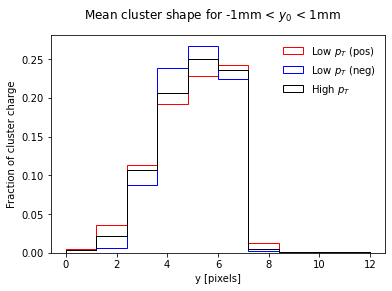

In [6]:
yprofile(9,-1,1)

0
-8 -6


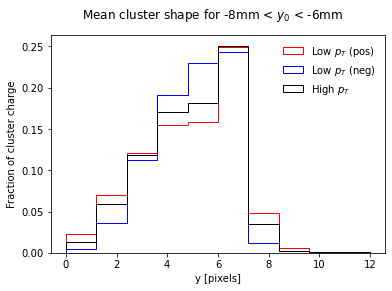

1
-6 -4


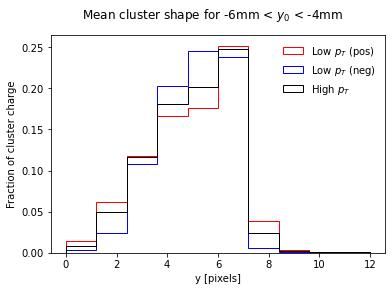

2
-4 -2


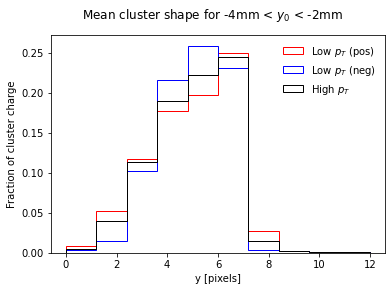

3
-2 0


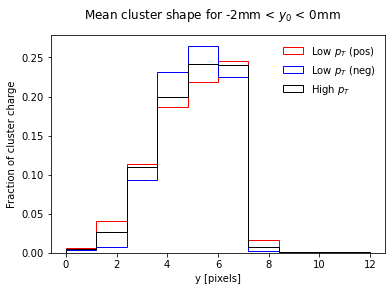

4
0 2


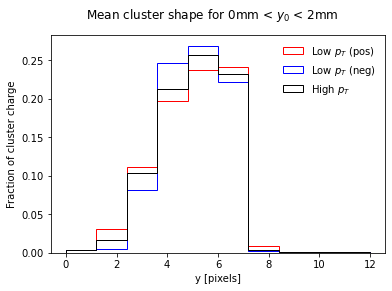

5
2 4


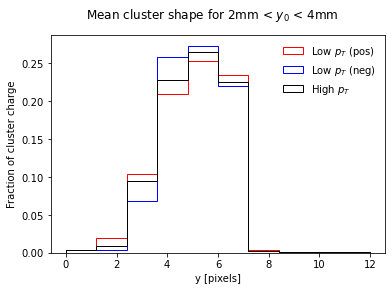

6
4 6


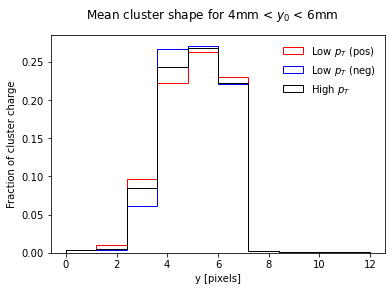

7
6 8


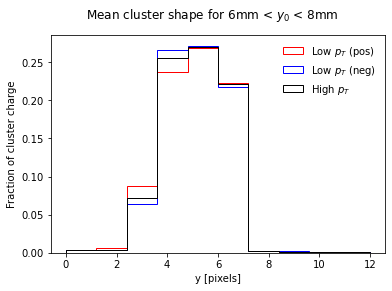

In [7]:
for i in range(0,8):
    print(i)
    yprofile(i,-8+2*i,-6+2*i)

In [8]:
x = np.repeat(a=range(0,13),repeats=len(df_pos_low))

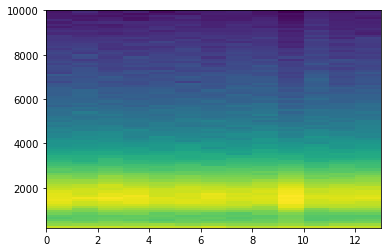

In [9]:
plt.hist2d(x=x,y=np.array(df_pos_low).flatten(),bins=[range(0,14),np.linspace(200,10000,100)],norm=colors.LogNorm());

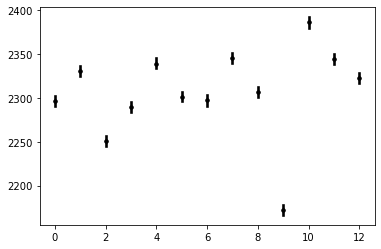

In [10]:
x = sns.regplot(x=x, y=np.array(df_pos_low.clip(400)).flatten(), x_bins=range(0,13), fit_reg=None, marker='.', ci=68, color='black')


In [11]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,31.0,13523.0,11479.0,12934.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,30.0,2155.0,2650.0,1703.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1351.0,3466.0,1074.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2151.0,23684.0,2953.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,604.0,2597.0,2144.0,2082.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_true['qtot'] = df_data.sum(axis=1)

In [13]:
df_true.head()

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane,qtot
0,187.960602,5.819384,100.0,-3.201757,-0.015797,-0.738721,37967.0,-0.963780,0.740845,4.334190,0.021384,4.750171,-28.748886,37967.0
1,9.408124,13.200923,100.0,0.826235,0.026282,-1.371215,6538.0,0.884188,1.372050,-0.602557,-0.019167,14.159270,39.535967,6538.0
2,84.732826,10.721191,100.0,-0.306291,0.083919,-0.791659,5891.0,4.285150,0.795417,0.386898,-0.106004,16.021390,65.387944,5891.0
3,-256.300446,-5.275360,100.0,7.125055,0.304351,-1.834402,28788.0,5.466930,1.858530,-3.884130,-0.165913,3.020286,-62.093969,28788.0
4,-46.793102,3.082501,100.0,-0.121722,-0.072646,-1.224502,7427.0,-1.060050,1.226800,0.099405,0.059327,0.116152,-51.763367,7427.0
